# Luvuyo Magwaza

# Instructions

* Change "Your Name Here" to your name.
* Fill in the empty chunks with your code. 
* Do not add any code chunks in your final submission besides the ones already here. 
* Use **no** additional modules other than:
    - `numpy`
    - `matplotlib`

In [3]:
# import modules here
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

# Question 1

Write a function called `sim_time_series(alpha, n)` that generates a correlated time series:

$$
x_{t+1} = \alpha x_t + \epsilon_t
$$

where $\epsilon_t \sim N(\mu = 0, \sigma^2 = 1)$.

The argument `alpha` is $\alpha$ and `n` is the number of observations. 

**Hint:** You will need a loop.

**Hint:** use `np.zeros()` to create the empty vector that will store your time series. 

In [39]:
# your code here
def sim_time_series(a, n):
    e = np.random.normal(loc = 0, scale = 1, size = n) # creating the error term, which normally distributed
    ts_vec = np.zeros(n) # creating and empty list, couldn't figure out how to use np.zeros
    for i in range(n):
        ts_vec[i] = a*i + e[i] # looping the equation over each element of n
        
    return(ts_vec)
        

    
    
    

Run your function with $\alpha = 0.5$ and $n = 300$, store the results in the object `ts`, then plot it. Label the axes.

<function matplotlib.pyplot.show(close=None, block=None)>

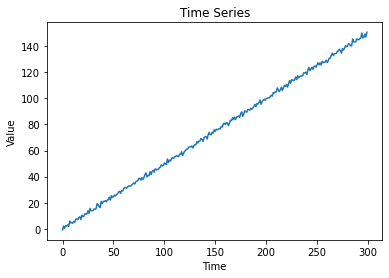

In [47]:
# your code here
ts = sim_time_series(0.5, 300) #creating time series plot of ts

plt.plot(ts)
plt.ylabel("Value")
plt.xlabel("Time")
plt.title("Time Series")
plt.show

# Question 2

Create a list called `alphas` with the values -0.5, 0.5, and 0.9. 

Loop over that list to create three time series. Set $n = 300$ for each one. 

Your loop should plot each time series *on the same figure*. Label the axes. Include a legend. 

**Hint:** Where should `plt.plot()` go? Inside or outside the loop?

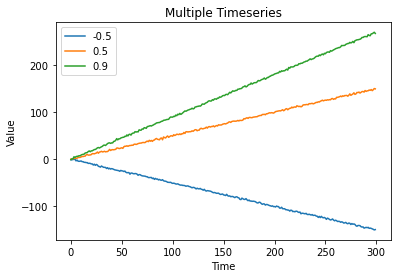

In [51]:
# your code here
alphas = np.array([-0.5,0.5,0.9]) # creatin an array with the alpha figures 

for i in alphas:
    plt.plot(sim_time_series(i, 300), label = i) # include the loop inside plot function. 
    plt.ylabel("Value")
    plt.xlabel("Time")
    plt.title("Multiple Timeseries")
    plt.legend()
    
    
    
    
    
 
    

# Question 3

Flip a biased coin where $P(heads = 0.75)$ 1000 times. Then confirm the coin is biased.

In [129]:
# your code here
X_coin = np.random.binomial(1, 0.75, 1000) # binomial with a success probability of .75

np.mean(X_coin) # if the coin is fair, it should be approximately 0.5 

0.737

# Question 4

Simulate 1000 draws from $x \sim U(0,1)$ and plot the histogram. Label the axes.

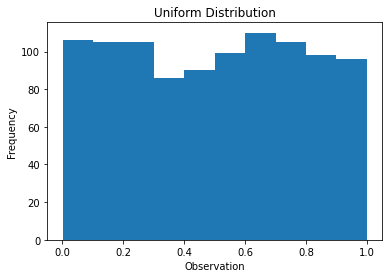

In [136]:
# your code here
X = np.random.uniform(0, 1, 1000) # create uniform distribution

plt.hist(X)
plt.xlabel("Observation")
plt.ylabel("Frequency")
plt.title("Uniform Distribution")
plt.show()

# Question 5

Simulate 1000 draws from $x \sim N(\mu = 10,\sigma^2 = 2)$ and plot the histogram. Label the axes.

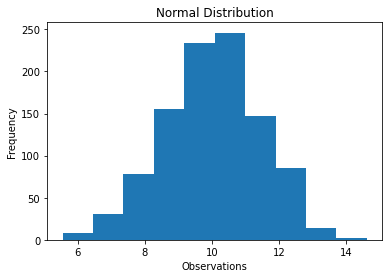

In [52]:
# your code here
X_dist = np.random.normal(loc = 10, scale = np.sqrt(2), size = 1000) # create normal distribution
plt.hist(X_dist)
plt.xlabel("Observations")
plt.ylabel("Frequency")
plt.title("Normal Distribution")
plt.show()

# Question 6

We can think of statistical distributions as **emergent properties.**

That means they emerge from small interactions. 

What kind of process generates a Normal distribution? 

Write a function called `emergent_normal(n_agents, n_steps)`. 

This function will simulate the following process:

* Some number of agents (`n_agents`) stand shoulder-to-shoulder on a line
* Each one draws a number $r \sim U(0,1)$
    - if $r > 0.5$ the agent takes one step forward
    - otherwise the agent takes on step backward
    - repeat a certain number of times (`n_steps`)

In [22]:
# your code here
def emergent_normal(n_agents, n_steps):
    pos = np.zeros(n_agents) # create a position list. Shows the position of each agent after drawing
    steps = np.zeros(n_steps) # create a number of steps list. Used to loop the number of steps an agent will take
    
    for i in range(n_steps): # create a loop for each time a person takes a step
        r = np.random.uniform(0,1,n_agents)
        
        for x in range(n_agents): # loop for each time each participants draws r. They either move up or down by one.
            if r[x]>0.5:
                pos[x] = pos[x] + 1
            
            else: 
                pos[x] = pos[x] - 1
    return(pos)

Run your function with 10 agents and 100 steps, then plot the distribution. Label the axes.

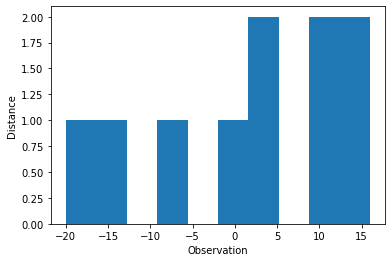

In [23]:
# your code here
X_2 = emergent_normal(10, 100)

plt.hist(X_2)
plt.xlabel("Observation")
plt.ylabel("Distance")
plt.show()

Run your function with 10,000 agents and 100 steps, then plot the distribution. Label the axes.

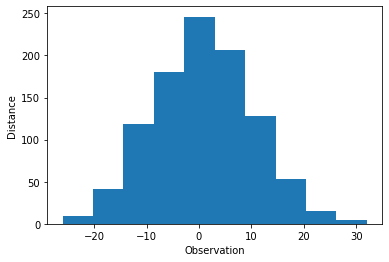

In [25]:
# your code here
X_1 = emergent_normal(1000, 100)

plt.hist(X_1)
plt.xlabel("Observation")
plt.ylabel("Distance")
plt.show()


# Question 7

Write a new function called `emergent_normal_vectorized(n_agents, n_steps)` that does the same simulation but in vectorized form.  

**Hint**: The new function should have only one loop.

**Hint**: How can you use the `size` argument in the random number generator and `np.where()` to your advantage? 

In [78]:
# your code here

def emergent_normal_vectorized(n_agents, n_steps):
    pos = np.zeros(n_agents) # create an empty array of zeroes that keeps track of the position
    
    #print(pos)
    for i in range(n_steps):
        r = np.random.uniform(0,1,n_agents)
        
        pos = np.where(r>0.5, pos+1, pos-1) # state the rule of the game: if r>.5, then move forward by one, otherwise move backwards by one 
    return(pos)

        
    

Run your function with 10,000 agents and 100 steps, then plot the distribution.

[ 14. -16.   8. ...   4.  -4. -12.]


<function matplotlib.pyplot.show(close=None, block=None)>

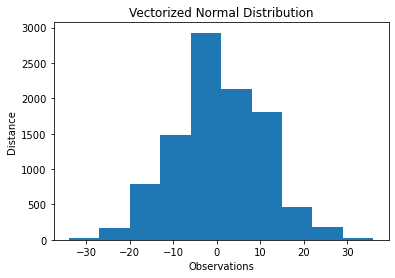

In [89]:
# your code here
X_3 = emergent_normal_vectorized(10000, 100)
print(X_2)
len(X_2)
plt.hist(X_2, bins = 10)
plt.ylabel("Distance")
plt.xlabel("Observations")
plt.title("Vectorized Normal Distribution")
plt.show